In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [16]:
df


,0,1,2,3,4,5,6
0,1.0,-0.000000,1.420282,0.0,0.004167,0.666667,0.0
1,81.0,1.230000,0.710141,0.0,0.008333,0.333333,0.0
2,82.0,99.630000,0.710141,0.0,0.508333,0.333333,0.0
3,83.0,3.690000,0.710141,0.0,0.020833,0.333333,0.0
4,84.0,102.089998,0.710141,0.0,0.520833,0.333333,0.0
...,...,...,...,...,...,...,...
230,76.0,189.420009,1.420282,0.0,0.966667,0.666667,0.0
232,77.0,93.479999,1.420282,0.0,0.479167,0.666667,0.0
234,78.0,191.879995,1.420282,0.0,0.979167,0.666667,0.0
236,79.0,95.940003,1.420282,0.0,0.491667,0.666667,0.0


/tmp/ipykernel_76570/3343917008.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap=plt.cm.get_cmap('coolwarm', 2))


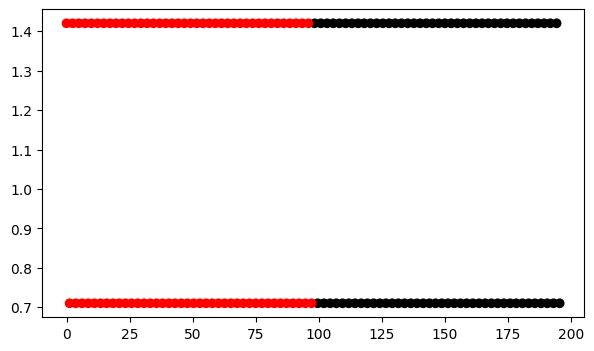

In [25]:
file = 'potential_0/TG_hr_with_atom_coord.dat'
structure = np.loadtxt(file, usecols=(3,5,6,7,11,12,13))
df = pd.DataFrame(structure)
column_name = 0
df = df.drop_duplicates(subset=column_name)
x = df[1]
x_direct = df[4]
y = df[2]
lattice_period =196.8000030518 # obtained from POSCAR x coordintate of lattice vector a
L = lattice_period # should be calculated as size of the unit cell along the x-axis
b = 0.5

U0 =  5
colors = []
potential = []
for i in range(len(x_direct)):
    # if 0 <= x.iloc[i] < b:
    if x_direct.iloc[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    colors.append(color)
    potential.append(V)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()


/tmp/ipykernel_76570/2105848430.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap=plt.cm.get_cmap('coolwarm', 2))


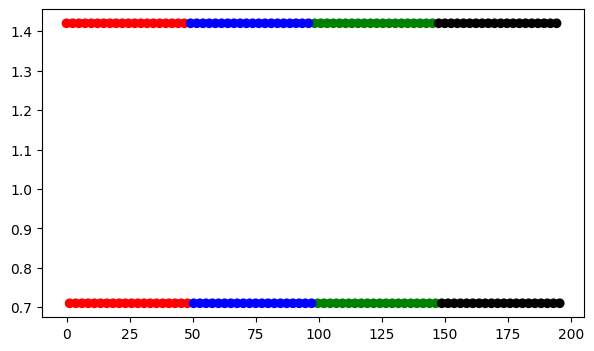

In [24]:
file = 'potential_0/TG_hr_with_atom_coord.dat'
structure = np.loadtxt(file, usecols=(3,5,6,7,11,12,13))
df = pd.DataFrame(structure)
column_name = 0
df = df.drop_duplicates(subset=column_name)
x = df[1]
x_direct = df[4]
y = df[2]
lattice_period =196.8000030518 # obtained from POSCAR x coordintate of lattice vector a
L = lattice_period # should be calculated as size of the unit cell along the x-axis
# b = L/2 #should be the x-coordinate of the mid point of the ribbon
b = 0.5

U0 =  5
perturb = 0.1 * U0/2.0
start1 = 0.25
end1 = 0.5
start2 = 0.5
end2 = 0.75

colors = []
potential = []
for i in range(len(x_direct)):
    # if 0 <= x.iloc[i] < b:
    if x_direct.iloc[i] < b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct.iloc[i] < end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct.iloc[i] < end2):
        V -= perturb
        color = 'green'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()


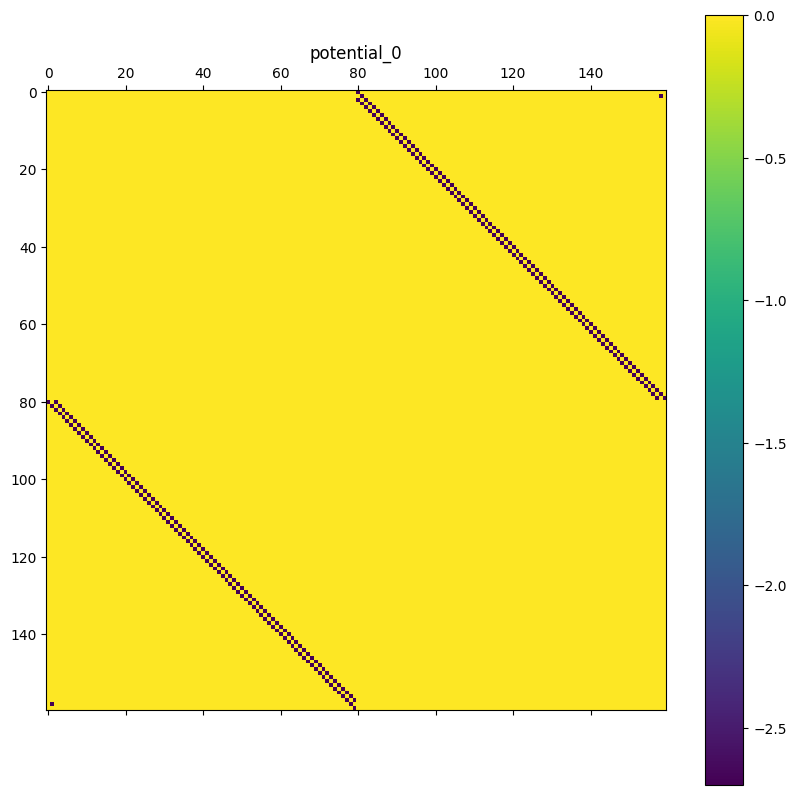

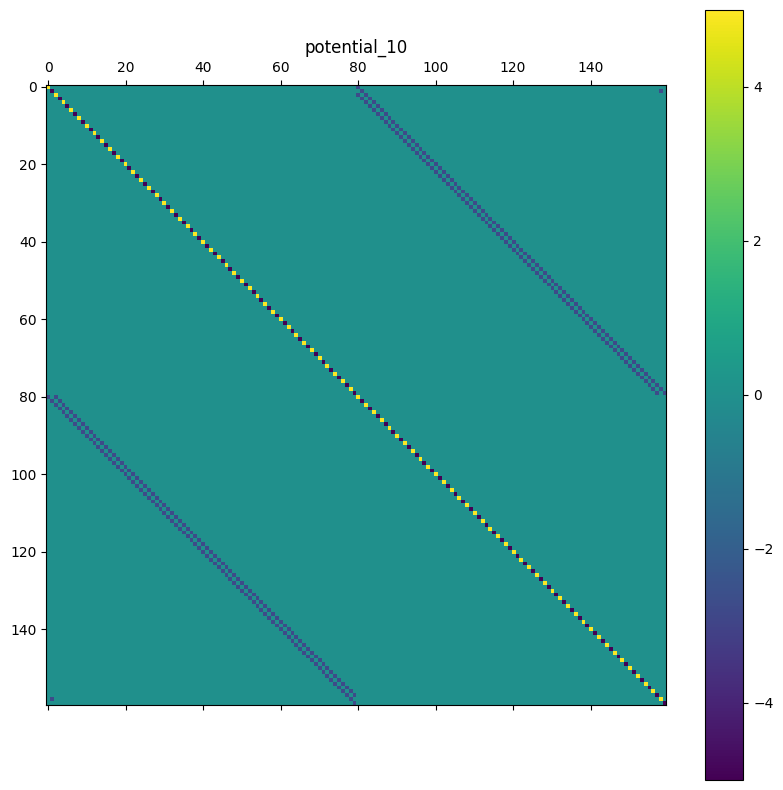

In [46]:
natoms = 160
subdirectory_list = ['potential_0','potential_10']
for subdirectory in subdirectory_list:
    HR = np.zeros((natoms,natoms))
    Hdata = np.loadtxt(f'{subdirectory}/TG_hr.dat',skiprows=8,usecols=(0,1,2,3,4,5))
    df = pd.DataFrame(Hdata)
    Hdata_center = df.loc[(df[0] == 0) & (df[1] == 0) & (df[2] == 0)].to_numpy()
    for i in range(len(Hdata_center)):
        atom1 = int(Hdata_center[i,3]-1)
        atom2 = int(Hdata_center[i,4]-1)
        HR[atom1,atom2] = Hdata_center[i,5]
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(HR, interpolation='nearest')
    fig.colorbar(cax)
    plt.title(f'{subdirectory}')
    plt.show()


In [ ]:
natoms = 160
subdirectory_list = ['potential_0','potential_10']
for subdirectory in subdirectory_list:
    HR = np.zeros((natoms,natoms))
    Hdata = np.loadtxt(f'{subdirectory}/TG_hr_with_atom_coord.dat',skiprows=8,usecols=(0,1,2,3,4,5,6,8,9))
    df = pd.DataFrame(Hdata)
    Hdata_center = df.loc[(df[0] == 0) & (df[1] == 0) & (df[2] == 0)].to_numpy()
    for i in range(len(Hdata_center)):
        atom1 = int(Hdata_center[i,3]-1)
        atom2 = int(Hdata_center[i,4]-1)
        HR[atom1,atom2] = Hdata_center[i,5]
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(HR, interpolation='nearest')
    fig.colorbar(cax)
    plt.title(f'{subdirectory}')
    plt.show()
